<h1>Introduction<h1/>

The 2022 Russia vs. Ukraine war caused Consumer Price Index (CPI) inflation to go up across the world in recent months. As expected, the inflation rate is higher in some countries compared to others due to differences in economic buoyancy. 

With consumers lamenting the current price of goods and services, I conducted an analysis of historical inflation rates to see how bad we have it compared to other periods in history. 

This analysis focuses on African countries only, as Africa is popularly known to be trailing the rest of the world in economic and technological development, hence probably has higher inflation rates than the rest of the world.

<h1>Pre-Analysis<h1/>

<h2>Data Source<h2/>

Source - Kaggle dataset on World inflation which was scraped from the World Bank Website

Link - [https://www.kaggle.com/datasets/bhupeshsinghrathore/world-inflation-dataset-19602021]

Note: The data covers 1960 - 2021.

<h2>Initial Questions

1. Which country had the highest ever inflation rate?
2. Which country had the lowest ever inflation rate?
3. Which country had the highest average inflation?
4. Which country had the lowest average inflation?
5. How does historical inflation compare to recent inflation rates?

<h1>Exploratory Data Analysis

<h2>Data Cleaning

Note: This analysis will be conducted using Python.

The first step is to set up the analysis environment by importing all the relevant libraries to be used in the analysis. 

In [1]:
# Import the important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Next, download the dataset to your local drive and import it into a pandas dataframe named inflation_df. 

This dataframe contains the inflation data of all countries in the world. 

In [2]:
# Download dataset from Kaggle and import from your local library into a pandas dataframe
inflation_df = pd.read_csv('C:/Users/HP/Documents/My Space/MOOCs/Data Projects/World Inflation/World Inflation Dataset 1960 - 2021/Data set for inflation.csv')
inflation_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


Some of the data in the dataframe are irrelevant to the analysis, e.g., the country and indicator codes, and indicator name. So, we will drop those columns. 

In [3]:
# Drop the columns that are irrelevant to the analysis
inflation_df.drop(['Country Code','Indicator Name','Indicator Code'], inplace=True, axis=1)

# Rename 'Country Name' column as 'Country'  
inflation_df.rename(columns={'Country Name':'Country'}, inplace=True)

# Check that the remaining columns are useful to the analysis
inflation_df.columns

Index(['Country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

The remaining columns are relevant to the analysis so we will maintain them. 

This analysis focuses on only African countries so the next step is to create a dataframe of only the African countries. 

In [4]:
# Create a dataframe of just the African countries
# Reset the index of the African countries dataframe to work with it
Africa = inflation_df.loc[inflation_df['Country'].isin(['Angola','Benin','Burkina Faso','Central African Republic','Cote d\'Ivoire',
'Cameroon','Congo, Dem. Rep.','Congo, Rep.','Djibouti','Algeria','Egypt, Arab Rep.','Ethiopia','Gabon','Ghana','Guinea',
'Guinea-Bissau','Equatorial Guinea','Kenya','Lebanon','Liberia','Libya','Lesotho','Morroco','Madagascar','Mali','Mozambique',
'Mauritania','Mauritius','Malawi','Namibia','Niger','Nigeria','Rwanda','Senegal','Sierra Leone','Somalia','Eswatini','Seychelles',
'Chad','Togo','Tanzania','Tunisia','Sao Tome and Principe','Uganda','South Africa','Zambia','Zimbabwe','Comoros','Cabo Verde','Sudan',
'Eritrea','Gambia, The','Botswana','Burundi','South Sudan',])].copy()
Africa.reset_index(drop=True, inplace=True)
Africa.head() 

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
1,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,4.436860,-1.089325,6.057269,...,18.161045,7.937958,4.405352,5.544689,5.557690,16.052535,-2.814698,-0.686772,7.321106,8.404538
2,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.744683,0.428889,-0.548758,0.218786,-0.794050,1.769412,0.644804,-0.705027,3.022721,1.733552
3,Burkina Faso,7.788162,18.562139,1.67591,5.574203,1.845123,-0.730253,2.364106,-4.333754,-0.286714,...,3.818152,0.533739,-0.258090,0.724839,0.441041,1.482999,1.955943,-3.233389,1.884701,3.653268
4,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.536903,5.884607,4.402253,3.062032,2.814958,3.308281,3.238016,2.772864,1.890359,7.240978


We now have all the African countries stored in the 'Africa' dataframe.

We can see that some countries have missing values. So, we will check how many countries are in the Africa dataframe and how many of them have missing values. 

In [5]:
# Check the number of African countries in the dataset
print('The number of countries in the Africa dataframe is:',Africa['Country'].value_counts().sum())

# Calculate the number of countries that have null values
print('The number of countries that have null values is:', Africa.isnull().any(axis=1).sum())

The number of countries in the Africa dataframe is: 54
The number of countries that have null values is: 48


48 out of the 54 countries in dataframe have missing (null) values. This means that only 6 countries have complete inflation data from 1960 to 2021. 

We know 48 countries have missing values, but we don't know how many values are missing from each of these countries. Let's find out by plotting a graph of the missing values.

In [6]:
# First, transpose the Africa dataframe to have the countries as columns. This will help us plot a bar graph of the missing values.
# Reset index of the dataframe 
Africa_tr = Africa.T
Africa_tr.columns = Africa_tr.iloc[0]
Africa_tr = Africa_tr.drop(index='Country')
Africa_tr.reset_index(inplace=True)
Africa_tr = Africa_tr.rename(columns= {'index':'Year'})

In [7]:
# Create a variable containing all the column names. This will be used in writing flow control statements.
columns = Africa_tr.columns[1:]

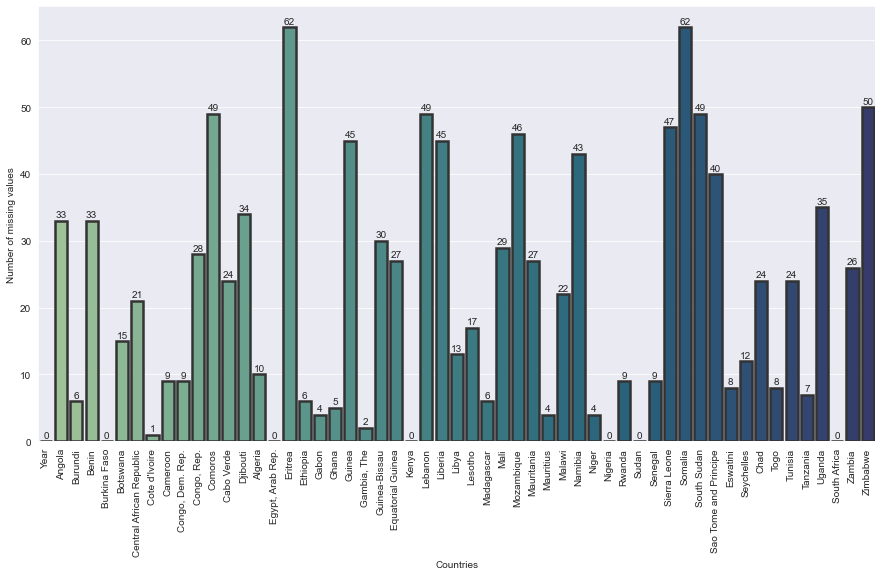

In [8]:
# Plot a graph of all missing values
plt.rcParams.update({'font.size': 10})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
ax = sns.barplot(x=Africa_tr.columns, y=Africa_tr.isna().sum(),linewidth=2.5, edgecolor=".2",palette='crest')

for col in ax.patches:
    height = col.get_height()
    ax.text(x= col.get_x() + (col.get_width()/2), y = height + 0.5,
    s = '{:.0f}'.format(height),
    ha = 'center')

plt.xlabel("Countries")
plt.ylabel("Number of missing values")
plt.show()

The graph reveals that a lot of countries have lots of missing values.

Only Burkina Faso, Egypt, Kenya, Nigeria, Sudan, and South Africa have complete inflation data, i.e., no missing values. 

Eritrea and Somalia have all 62 of their values missing, i.e., no inflation data.

We will drop them from the dataframe as it makes no sense to keep them in the analysis.

In [9]:
# Drop Eritrea and Somalia from the Africa_tr dataframe
Africa_tr.drop(['Eritrea','Somalia'], inplace=True, axis=1)
columns = Africa_tr.columns[1:]
columns

Index(['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', 'Cote d'Ivoire', 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Comoros', 'Cabo Verde', 'Djibouti',
       'Algeria', 'Egypt, Arab Rep.', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea',
       'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Kenya', 'Lebanon',
       'Liberia', 'Libya', 'Lesotho', 'Madagascar', 'Mali', 'Mozambique',
       'Mauritania', 'Mauritius', 'Malawi', 'Namibia', 'Niger', 'Nigeria',
       'Rwanda', 'Sudan', 'Senegal', 'Sierra Leone', 'South Sudan',
       'Sao Tome and Principe', 'Eswatini', 'Seychelles', 'Chad', 'Togo',
       'Tunisia', 'Tanzania', 'Uganda', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country')

We can now commence our exploratory data analysis with the remaining data available. 

<h2>Data Analysis

Let's compare the inflation rate of all the countries. We will do this by plotting a line graph of the inflation rate of all countries on the same chart. 

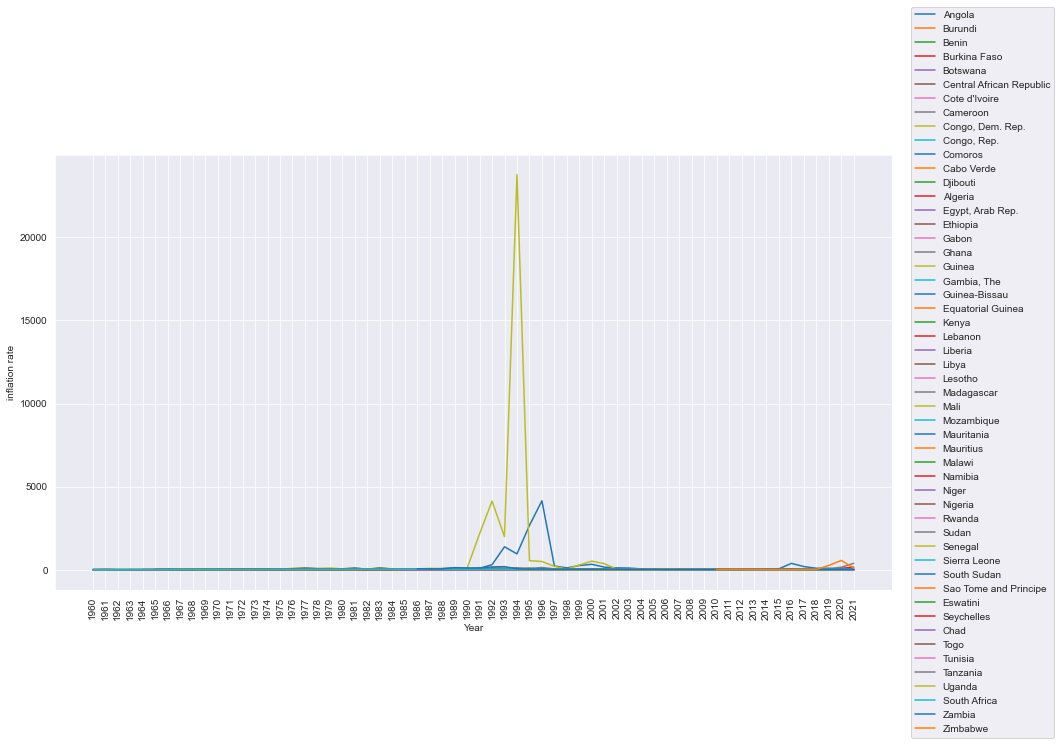

In [10]:
# Plot a line graph to show the inflation trend of each country on the same graph. 
plt.rcParams['figure.figsize']=15,8
plt.ylabel("inflation rate")
plt.xticks(rotation=90)

for country in columns:
    sns.lineplot(data=Africa_tr, x = 'Year', y = country)

plt.legend(columns, bbox_to_anchor=(1.2,0.5), loc='right')

plt.show()

One value immediately stands out from the graph above. 

However, the legend contains so many similar looking colors making it hard to identify the country with the standout value with certainty. 

So, lets find the maximum inflation rate for each country to identify which country's inflation sky rocketed beyond 20,000 around 1994.


In [11]:
# View the maximum values of inflation to see the actual values
Africa_tr.max()

Country
Year                               2021
Angola                      4145.105982
Burundi                       36.540757
Benin                         38.530866
Burkina Faso                  29.986104
Botswana                      16.428027
Central African Republic      24.571014
Cote d'Ivoire                 27.421862
Cameroon                      35.094462
Congo, Dem. Rep.            23773.13177
Congo, Rep.                   42.439675
Comoros                        6.314745
Cabo Verde                        11.25
Djibouti                      18.147633
Algeria                       31.669662
Egypt, Arab Rep.              29.506608
Ethiopia                      44.356686
Gabon                         36.116246
Ghana                        122.874515
Guinea                        34.695271
Gambia, The                   56.560172
Guinea-Bissau                 80.788141
Equatorial Guinea             31.841017
Kenya                         45.978881
Lebanon                      154

These values reveal the following as the top five highest ever inflation rates: 
1. Democratic Republic of Congo - 23,773.13%
2. Angola - 4,145.11% (5.7 times less than that of D.R. Congo)
3. Zimbabwe - 557.20% (7.4 times less than Angola and 42.7 times less than D.R. Congo)
4. Sudan - 382.82% 
5. South Sudan - 379.999586%

These five countries have the highest maximum inflation in history. We will group them into a variable called 'high_countries.'

Only three other countries had a maximum inflation greater 100. These are:  
1. Zambia - 183.312041%
2. Lebanon - 154.756096%
3. Ghana - 122.874515%

We will group these three countries into a variable called 'medium_countries.'

Next, we will plot graphs of the high_countries and the medium_countries to visualize their inflation trends better. 

Firstly, the high_countries:

C:\Users\HP\AppData\Local\Temp\ipykernel_12232\978168358.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


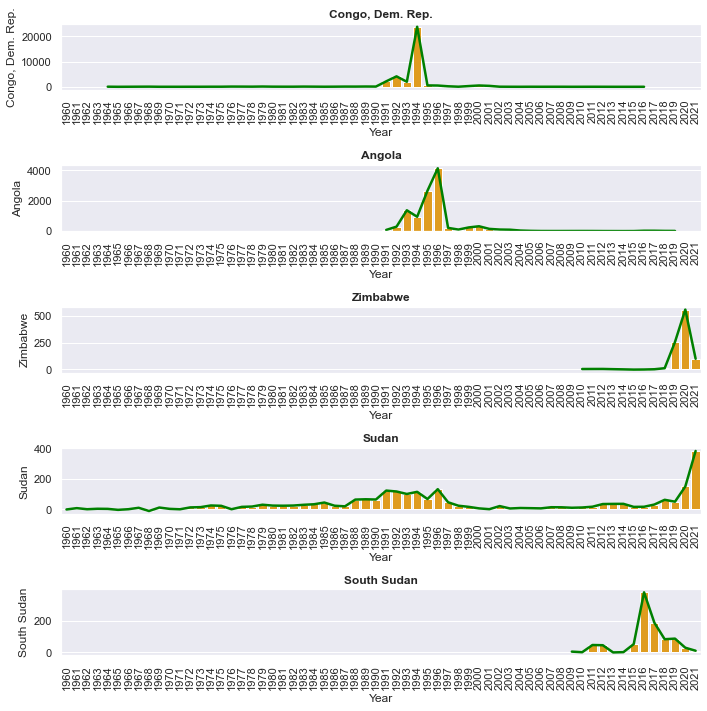

In [12]:
# Create variables for the list of countries with historically high and medium inflation rates
# High and low here are judged relative to the values of the inflation of other countries
high_countries = ['Congo, Dem. Rep.','Angola','Zimbabwe','Sudan','South Sudan']
medium_countries = ['Zambia','Lebanon','Ghana']

# Plot the graph of the countries with historically high inflation rates
from turtle import color

sns.set(font_scale=1)
fig, axes = plt.subplots(5,1, figsize = (10,10))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat, high_countries):
    sns.lineplot(data=Africa_tr, x='Year', y=col, color='Green', linewidth= 2.5, markers='o', ax = ax)
    sns.barplot(data= Africa_tr, x= 'Year', y=col, color= 'Orange', ax=ax)
    ax.set_title(col, fontweight='bold')
    ax.set_xticklabels(Africa_tr['Year'], rotation= 90)

fig.tight_layout()
fig.show()

The graphs show the following:
1. The Democratic Republic of Congo's inflation skyrocketed in 1994 to a value of 23,773%. This signals a sudden and major economic instability in that year.  

2. Angola's inflation also had a sharp rise in 1995 and peaked even higher in 1996 at 4145%. This also signals a major economic instability in those years. However, the inflation rate plumeted back down in 1997, suggesting the end of the economic 'winter'.

3. Zimbabwe had incomplete inflation data. However, the data available shows a rise in inflation rate before, and during the pandemic. Their inflation rate hit a peak of 557% in 2020 during the pandemic, but dropped to around 100% in 2021. 

4. Sudan's inflation rate rose from the late 80s into the 90s, but dropped in the late 90s. However, it shot up to 382.8% in 2021, after rising gradually over the prior years. This sharp rise in 2020 and 2021 is most likely due to the pandemic. 

5. South Sudan's inflation data begins from 2009. It peaked in 2016 at 380%, signaling economic instability. It then dropped gradually in the following years, and fell close to 0% in 2021.

The causes of these astronomical rises in the inflation rates of these countries can be investigated further. 

For example, there was a civil war in D.R. Congo in 1994, which would explain the rocketing of their inflation rate that year.

However, such further investigation is beyond the scope of this analysis. 

Next, we plot the graphs of the medium_countries to visualize their inflation trends better.

C:\Users\HP\AppData\Local\Temp\ipykernel_12232\1099877489.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


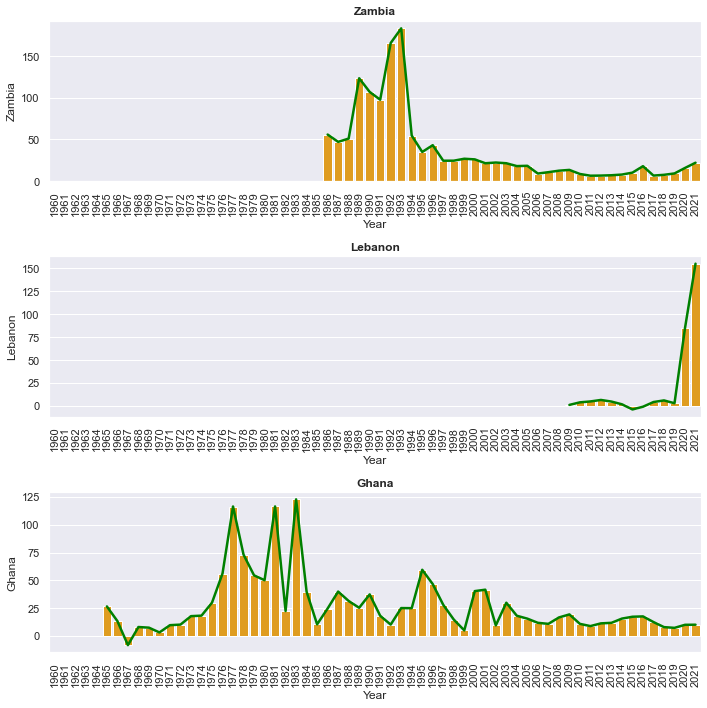

In [13]:
# Plot the graph of the countries with historically medium inflation rates
sns.set(font_scale=1)
fig, axes = plt.subplots(3,1, figsize = (10,10))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat, medium_countries):
    sns.lineplot(data=Africa_tr, x='Year', y=col, color='Green', linewidth= 2.5, markers='o', ax = ax)
    sns.barplot(data= Africa_tr, x= 'Year', y=col, color= 'Orange', ax=ax)
    ax.set_title(col, fontweight='bold')
    ax.set_xticklabels(Africa_tr['Year'], rotation= 90)

fig.tight_layout()
fig.show()

The graphs reveal the following:

1. Zambia's inflation peaked in 1993 at 183%, however the inflation rate had been above 50% since 1986. It dropped back to around 50% in 1994, and dropped steadily till 2015. It rose again in 2016, fell in 2017, and rose steadily ever since. The effects of the pandemic can be seen in it's rise in 2020 and 2021. 

2. Lebanon's inflation data begins from 2010. The inflation rate was very low tll 2019. However, it shot above 75% in 2020 and peaked in 2021 at 154.8%. 

3. Ghana's inflation was particularly high in the years 1977 and 1981, but it peaked at 122.9% in 1983. It dropped below 40% in the following years, but spiked to around 60% in 1995. It has since dropped and stayed below 20% since 2004. Ghana's best inflation period was in 1967 where they had a negative inflation rate, indicating a booming economy. 

Again, the causes of these inflation rates can be investigated further, but that is beyond the scope of this analysis. 

Now, we will turn our attention to the other African countries. 

We will plot an individual bar graph for the inflation of each country, to visualize their inflation trend better. 

In [14]:
# Plot the graph of each individual country to visualize it better
fig, axes = plt.subplots(26,2, figsize=(100,150))
fig.subplots_adjust(hspace=1.0, wspace=.15)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Year',fontsize=6)
plt.ylabel('Inflation Rate',fontsize=6)
sns.set(font_scale=3)
for ax, col in zip(axes.flat, columns):
    sns.barplot(data=Africa_tr, x='Year', y=col, color='Blue',ax = ax)
    ax.set_title(col,fontweight='bold')
    ax.set_xticklabels(Africa_tr['Year'], rotation=90)

fig.tight_layout()
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12232\1020629099.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


These graphs are a lot. Seeing as we are interested in the general inflation trend historically, let's find the average inflation of each country.

In [15]:
# Let's analyze the average inflation of each country
Avg_Africa = Africa_tr
Avg_Africa.drop(['Year'], inplace=True, axis=1)

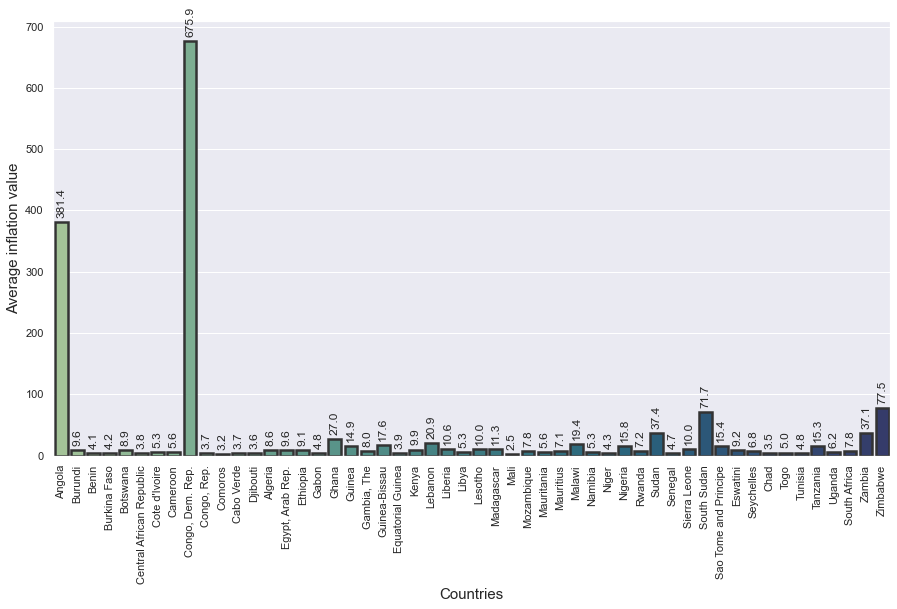

In [16]:
# Plot a graph of the average inflation value of all countries

plt.rcParams.update({'font.size': 1})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.set(font_scale=1)
ax = sns.barplot(x=Avg_Africa.columns, y=Avg_Africa.mean(),linewidth=2.5, edgecolor=".2",palette='crest')
ax.set_xticklabels(Avg_Africa.columns,rotation=90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Average inflation value", fontsize = 15)

for col in ax.patches:
    height = col.get_height()
    ax.text(x= col.get_x() + (col.get_width()/2), y = height + 10,
    s = '{:.1f}'.format(height),
    ha = 'center', rotation = 90)
plt.show()

In [17]:
print('The highest average inflation was:', Avg_Africa.mean().max())
print('The lowest average inflation was:', Avg_Africa.mean().min())

The highest average inflation was: 675.8544335565283
The lowest average inflation was: 2.481332518242424


As expected, the high_countries and the medium_countries from earlier have the highest average inflation rates in the data.

But what was the average inflation for the whole continent?

In [31]:
# Calculate the average inflation of the whole Africa for 1960 - 2021
Avg_Africa.mean().mean()

32.14897092439809

Africa's average inflation between 1960 and 2021 was ~32.1%.

Let's explore the average inflation of each country further. 

We will drop the high_countries and medium_countries, as they have been analyzed earlier, and analyze the average inflation of the remaining African countries. 

In [18]:
# Drop the high_countries and the medium_countries from the dataframe. 
Africa_others = inflation_df.loc[inflation_df['Country'].isin([ 
'Benin','Burkina Faso','Central African Republic','Cote d\'Ivoire',
'Cameroon','Congo, Rep.','Djibouti','Algeria', 
'Egypt, Arab Rep.','Ethiopia','Gabon','Guinea', 
'Guinea-Bissau','Equatorial Guinea','Kenya','Liberia',
'Libya','Lesotho','Morroco','Madagascar','Mali','Mozambique',
'Mauritania','Mauritius','Malawi','Namibia','Niger','Nigeria',
'Rwanda','Senegal','Sierra Leone','Somalia','Eswatini','Seychelles',
'Chad','Togo','Tanzania','Tunisia','Sao Tome and Principe','Uganda',
'South Africa','Comoros','Cabo Verde',
'Eritrea','Gambia, The','Botswana','Burundi'])].copy()
Africa_others = Africa_others.T
Africa_others.columns = Africa_others.iloc[0]
Africa_others = Africa_others.drop(index='Country')
Africa_others.reset_index(inplace=True)
Africa_others = Africa_others.rename(columns={'index':'Year'})
Africa_others.drop(['Year','Eritrea','Somalia'], inplace= True, axis= 1)
Africa_others.head()

Country,Burundi,Benin,Burkina Faso,Botswana,Central African Republic,Cote d'Ivoire,Cameroon,"Congo, Rep.",Comoros,Cabo Verde,...,Sierra Leone,Sao Tome and Principe,Eswatini,Seychelles,Chad,Togo,Tunisia,Tanzania,Uganda,South Africa
0,NaN,NaN,7.788162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.288859
1,NaN,NaN,18.562139,NaN,NaN,11.616492,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.102374
2,NaN,NaN,1.67591,NaN,NaN,-1.341249,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.246285
3,NaN,NaN,5.574203,NaN,NaN,0.943466,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33797
4,NaN,NaN,1.845123,NaN,NaN,0.618193,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.534973


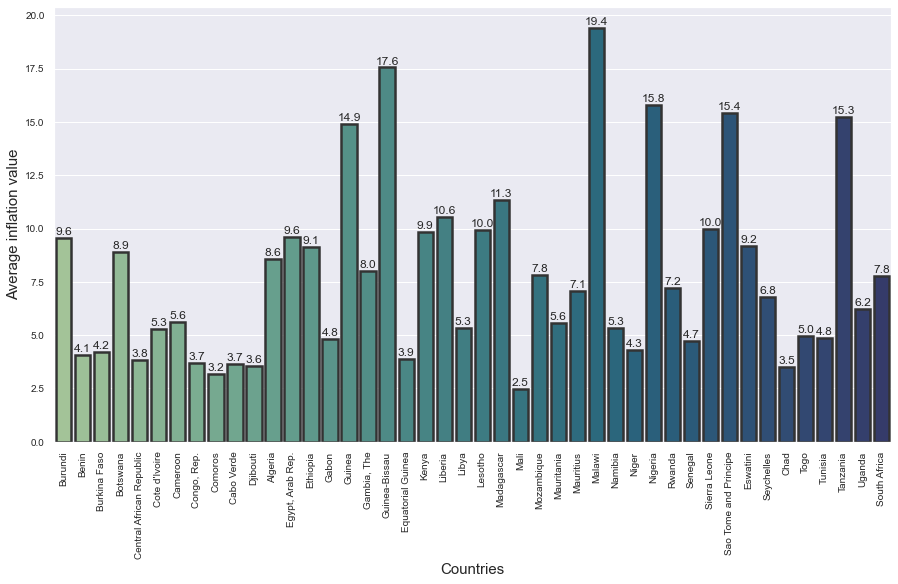

In [19]:
# Plot a graph of the average inflation of the other countries (i.e., all African countries excluding the high_countries and medium_countries)
plt.rcParams.update({'font.size': 1})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.set(font_scale=1)
ax = sns.barplot(x=Africa_others.columns, y=Africa_others.mean(),linewidth=2.5, edgecolor=".2",palette='crest')

for col in ax.patches:
    height = col.get_height()
    ax.text(x= col.get_x() + (col.get_width()/2), y = height + 0.15,
    s = '{:.1f}'.format(height),
    ha = 'center')

plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Average inflation value", fontsize = 15)
plt.show()

Mali had the lowest average inflation rate at 2.5%.

Malawi had the highest average inflation rate at 19.4%.

Only five countries had an average inflation greater than 15% namely:
The Gambia, Malawi, Nigeria, Sao Tome and Principe, and Tanzania.  

Liberia, Madagascar, and Sierra Leone had inflation rates greater than or equal to 10%, but less than 15%. 



Data limitation: A lot of the countries had incomplete inflation data. It is possible that the inflation rate of the missing years are very high or very low, and would have skewed their average inflation for the range being considered (1960 - 2021).

Let's use a scatter plot to see if there is any correlation between the average inflation rate and the number of missing values.

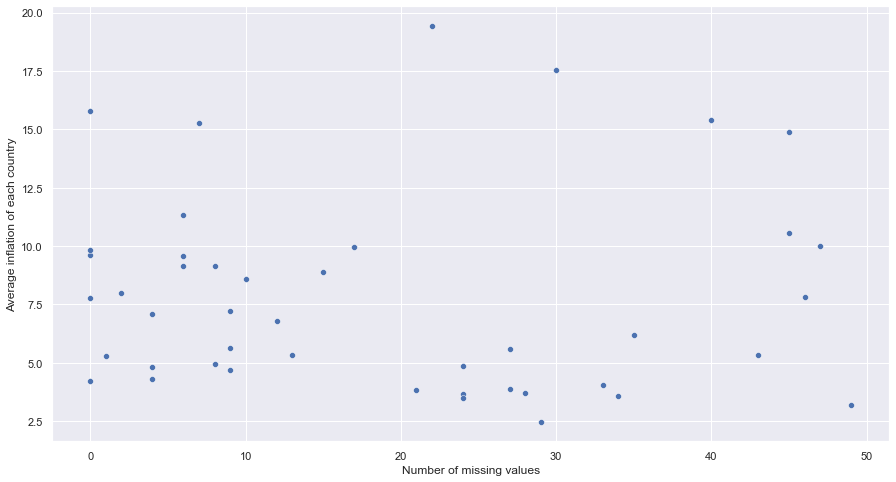

In [28]:
# Plot a scatter plot of all missing values
plt.rcParams.update({'font.size': 10})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.scatterplot(x=Africa_others.isna().sum(), y=Africa_others.mean())
plt.xlabel("Number of missing values")
plt.ylabel("Average inflation of each country")
plt.show()

The graph does not show enough correlation between the average inflation rates and the number of missing values. 

This must be because inflation can be caused by several factors which could have happened in any year, whether it was included in the dataset or not. 

Let's also find which country had the lowest ever inflation rate and what the value was. 

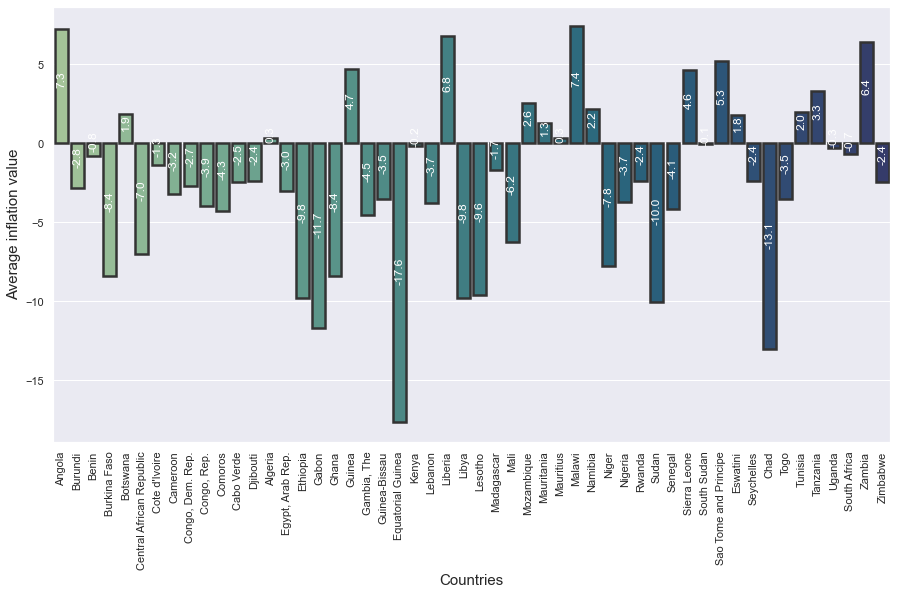

In [46]:
# Plot the minimum inflation values 
plt.rcParams.update({'font.size': 1})
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.set(font_scale=1)
ax = sns.barplot(x = Africa_tr.columns, y = Africa_tr.min(),linewidth=2.5, edgecolor=".2",palette='crest')
ax.set_xticklabels(Africa_tr.columns,rotation=90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel("Average inflation value", fontsize = 15)

for col in ax.patches:
    height = col.get_height()
    ax.text(x= col.get_x() + (col.get_width()/2), y = height/2,
    s = '{:.1f}'.format(height),
    ha = 'center', color = 'white', rotation = 90)
plt.show()

Equatorial Guinea had the lowest ever inflation rate with a value of -17.6%. Studying it's graph from the group above shows that this value was achieved in 1986.

<h3> Other Observations

Studying the graphs of the inflation trend of each country closely reveals something interesting. I noticed that countries that were colonized by the French, Belgians and Germans have had lower inflation rates than those colonized by other countries (e.g., the British, Italians, Spanish and Portugese). 

Let's investigate further to confirm or refute this hypothesis. 

We will create variables that group each country into these two groups of colonial masters. Some domain knowledge in African history will be handy here, and of course, Google is still our best friend. 

In [21]:
# Create a variable, FG_colonies, for a list of the countries colonized by the French, Belgians and Germans
# Create another variable, Other_colonies, for a list of the countries colonized by the British, Italians, Spanish and Portugese

FG_colonies = Africa.loc[Africa['Country'].isin(['Benin','Burkina Faso','Central African Republic','Cote d\'Ivoire',
'Cameroon','Congo, Dem. Rep.','Congo, Rep.','Djibouti','Algeria','Gabon','Guinea','Lebanon',
'Morroco','Madagascar','Mali','Mauritania','Mauritius','Namibia','Niger',
'Rwanda','Senegal','Seychelles','Chad','Togo','Tanzania','Tunisia','Comoros',
'Burundi'])].copy()

Other_colonies = Africa.loc[Africa['Country'].isin(['Angola','Egypt','Ghana','Guinea-Bissau','Equatorial Guinea','Kenya','Liberia',
'Libya','Lesotho','Mozambique','Malawi','Nigeria','Sierra Leone', 'Somalia','Eswatini',
'Sao Tome and Principe','Uganda','South Africa','Zambia','Zimbabwe','Cabo Verde',
'Sudan','Eritrea','Gambia, The','Botswana','South Sudan'])]

In [22]:
# Create a function for transposing the dataframes
def transpose(countries):
    countries = countries.T
    countries.columns = countries.iloc[0]
    countries = countries.drop(index= 'Country')
    countries.reset_index(inplace=True)
    countries = countries.rename(columns={'index':'Year'})
    return countries

# Transpose the dataframes 
FG_colonies_tr = transpose(FG_colonies)
Other_colonies_tr = transpose(Other_colonies)

# Drop the Year column in each dataframe (we don't need the average of the years skewing our analysis)
FG_colonies_tr.drop(columns=['Year'], inplace=True, axis=1)
Other_colonies_tr.drop(columns=['Year'], inplace=True, axis=1)

To validate our hypothesis, we will find the average inflation of each country in both categories. Thereafter, we will find the average of these averages to get the average inflation rate for each category of countries by colonizers. That might sound a bit confusing, so take a moment to process and understand it. 

In [23]:
# Calculate the mean of the countries colonized by France, Belgium, and Germany. Then, find the average of these means.
mean_fg = FG_colonies_tr.mean().mean()
mean_fg

31.537131972080456

In [24]:
# Calculate the mean of the countries with other colonial masters. Then, find the average of these means. 
mean_other = Other_colonies_tr.mean().mean()
mean_other

34.84704204292295

These results show that the FG_colonies had an average of inflation of ~31.5%, while the Other_colonies had an average inflation of ~34.8%. This represents a difference of 3.3%.

According to Sean Ross of Investopedia, the US "Federal Reserve targets a 2% inflation rate, based on Consumer Price Index (CPI)." 

Applying this metric, we can conclude that the 3.3% difference is significant enough to confirm our hypothesis.

However, let's dig a little deeper. There is a group of 8 Francophone countries in a union called West African Economic and Monetary Union (WAEMU). These countries store their federal reserves in France (in Euros) protecting their reserves from local inflation. Let's see if these countries had a lower average inflation rate than the continent. 

In [25]:
# Create a variable for the WAEMU countries
waemu = Africa.loc[Africa['Country'].isin(['Benin','Burkina Faso','Cote d\'Ivoire','Guinea-Bissau','Mali','Niger','Senegal','Togo'])].copy()
waemu = transpose(waemu)
waemu.drop(columns=['Year'], inplace= True, axis=1)
waemu.mean().mean()

5.950852520051235

The WAEMU countries do infact have a lower average inflation rate than the FG_colonies. This confirms that the idea of storing their federal reserves in France was wise. 

However, let's see how big an effect our data limitation of missing values has on this conclusion.

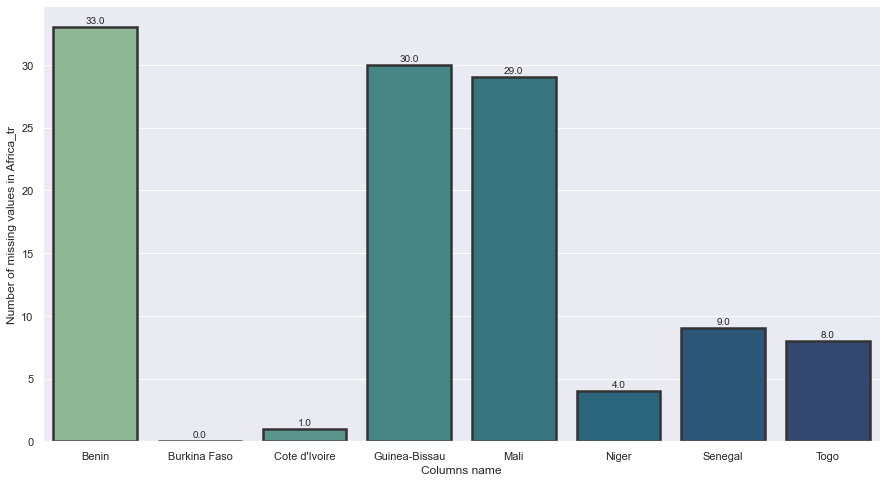

In [26]:
# Plot a graph of the missing values in the waemu dataframe
ax = sns.barplot(x=waemu.columns, y=waemu.isna().sum(),linewidth=2.5, edgecolor=".2",palette='crest')
for col in ax.patches:
    height = col.get_height()
    ax.text(x= col.get_x() + (col.get_width()/2), y = height + 0.3,
    s = '{:.1f}'.format(height),
    ha = 'center')

plt.xlabel("Columns name")
plt.ylabel("Number of missing values in Africa_tr")
plt.show()

This shows that out of 62 expected values, Benin, Guinea-Bissau, and Mali had close to half of their inflation data missing. 

However, a lot of other countries also had missing values so we can ignore this. 

Therefore, we can conclude that the WAEMU countries had an average inflation rate that is ~5.4 times less than that of the continent. 

This means that storing your federal reserve in a stronger economy is indeed a good inflation hedge.

<h2>Conclusion<h2/>

The average inflation in Africa between 1960 and 2021 was ~32.1%.

The maximum ever inflation was in D.R. Congo, in 1994, with a value of 23,773%.
Unsurprisingly, they also had the highest average inflation: 675.8%.

The lowest ever inflation was in Equatorial Guinea, in 1986 with a value of -17.6%.

The country with the lowest average inflation was Mali: 2.5%
(However, Mali's inflation data was incomplete making this conclusion questionable).

The West African Economic and Monetary Union, WAEMU, is a union of 8 Francophone countries.
These countries store their federal reserves in France. 
The average inflation of these countries was 5.95%. 
This is 5.4 times less than the average inflation of the continent. 

Therefore, while other economic arguments can be made against this, the data shows that 
storing your federal reserve in a stronger economy is a good hedge against inflation. 

Finally, according to research by Statista, inflation in Sub-Saharan Africa is set
to grow to 12.2% in 2022. This is lower than the average inflation in Africa over the last
62 years (~32.1%). 
Therefore, as a continent, current inflation levels are lower than the average over the last 
six decades. 
